C:\Users\oyj57\AppData\Local\Temp\ipykernel_18584\796244433.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_brazil['Date'] = pd.to_datetime(data_brazil['year'].astype(str) + '-' + data_brazil['month'].astype(str), format='%Y-%m')


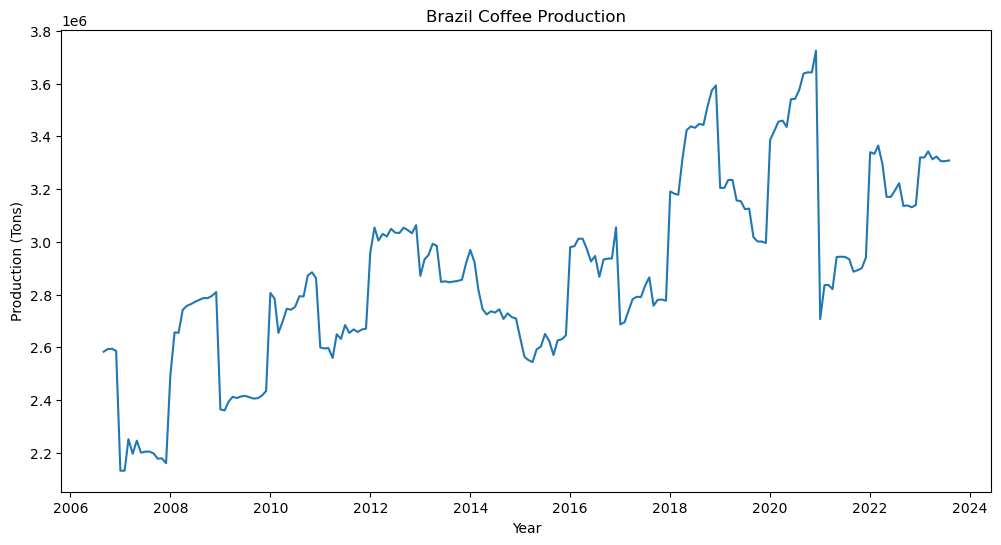

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# 데이터 불러오기
data = pd.read_excel("C:/Users/oyj57/Downloads/archive/브라질원두생산량.xlsx") # 데이터 파일 경로를 변경하세요.

# 'location'이 '브라질'인 데이터만 선택
data_brazil = data[data['location'] == 'Brazil']

# 'year'와 'month' 컬럼을 합쳐서 'Month' 컬럼 생성
data_brazil['Date'] = pd.to_datetime(data_brazil['year'].astype(str) + '-' + data_brazil['month'].astype(str), format='%Y-%m')

# 필요한 컬럼 선택
data_brazil = data_brazil[['Date', '생산량(톤)']]

# 'Month' 컬럼을 인덱스로 설정
data_brazil.set_index('Date', inplace=True)

# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.plot(data_brazil)
plt.title('Brazil Coffee Production')
plt.xlabel('Year')
plt.ylabel('Production (Tons)')
plt.show()



In [4]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

C:\Users\oyj57\AppData\Local\Temp\ipykernel_18584\1083117251.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_brazil['Date'] = data_brazil['year'] + (data_brazil['month'] - 1) / 12


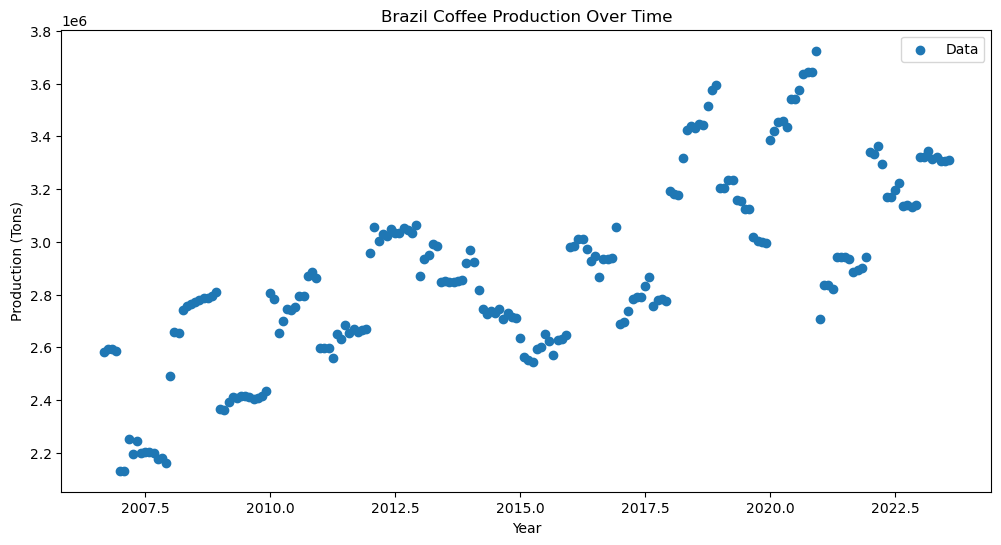

추세 기울기 (slope): 53181.59
추세 절편 (intercept): -104284478.43


In [13]:
data = pd.read_excel("C:/Users/oyj57/Downloads/archive/브라질원두생산량.xlsx") # 데이터 파일 경로를 변경하세요.

data_brazil = data[data['location'] == 'Brazil']

# 'year'와 'month' 컬럼을 합쳐서 'Year' 컬럼 생성
data_brazil['Date'] = data_brazil['year'] + (data_brazil['month'] - 1) / 12

# 필요한 컬럼 선택
data_brazil = data_brazil[['Date','생산량(톤)']]

# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.scatter(data_brazil['Date'], data_brazil['생산량(톤)'], label='Data')
plt.title('Brazil Coffee Production Over Time')
plt.xlabel('Year')
plt.ylabel('Production (Tons)')
plt.legend()
plt.show()

X = data_brazil[['Date']]
y = data_brazil['생산량(톤)']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 추세 기울기와 절편 출력
slope = model.coef_[0]
intercept = model.intercept_
print(f'추세 기울기 (slope): {slope:.2f}')
print(f'추세 절편 (intercept): {intercept:.2f}')

C:\Users\oyj57\AppData\Local\Temp\ipykernel_18584\2365707882.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sbrazil['Date'] = data['year'] + (data['month'] - 1) / 12


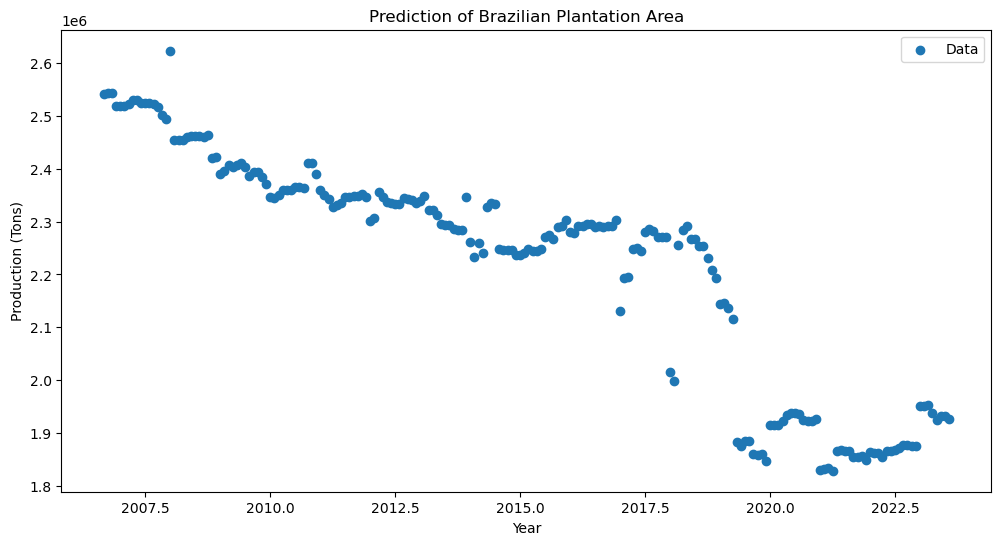

추세 기울기 (slope): -40228.75
추세 절편 (intercept): 83286884.51


In [39]:
data = pd.read_excel("C:/Users/oyj57/Downloads/archive/브라질원두생산량.xlsx") # 데이터 파일 경로를 변경하세요.

data_sbrazil = data[data['location'] == 'Brazil']


# 'year'와 'month' 컬럼을 합쳐서 'Year' 컬럼 생성
data_sbrazil['Date'] = data['year'] + (data['month'] - 1) / 12

data_sbrazil =  data_sbrazil[['Date','재배면적(헥타르)']]

# 데이터 시각화
plt.figure(figsize=(12, 6))
plt.scatter(data_sbrazil['Date'], data_sbrazil['재배면적(헥타르)'], label='Data')
plt.title('Brazilian Plantation Area')
plt.xlabel('Year')
plt.ylabel('Production (Tons)')
plt.legend()
plt.show()

X = data_sbrazil[['Date']]
y = data_sbrazil['재배면적(헥타르)']

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 추세 기울기와 절편 출력
slope = model.coef_[0]
intercept = model.intercept_
print(f'추세 기울기 (slope): {slope:.2f}')
print(f'추세 절편 (intercept): {intercept:.2f}')

C:\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


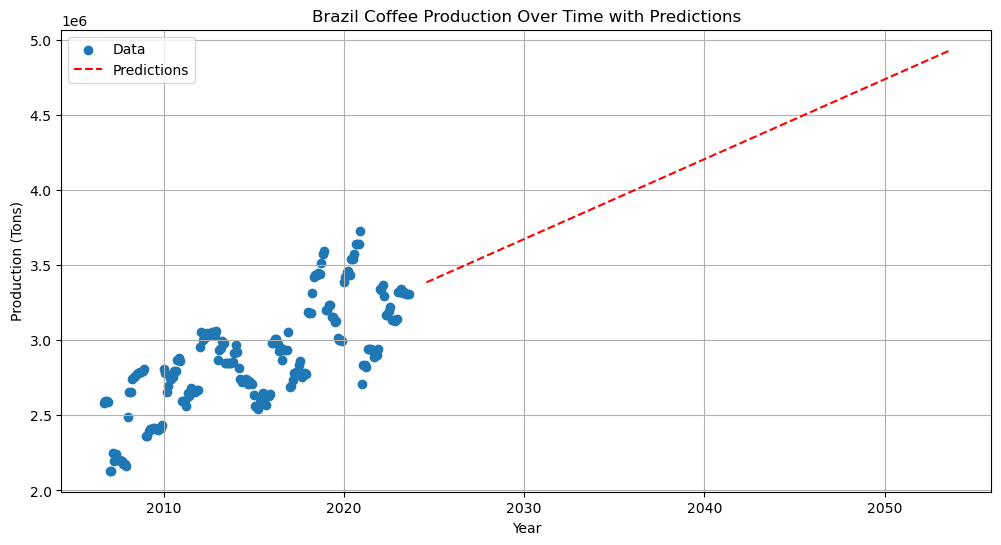

In [19]:
years_in_future = range(1, 31)  # 1년 후부터 30년 후까지
future_years = [data_brazil['Date'].max() + years for years in years_in_future]
predicted_productions = model.predict(np.array(future_years).reshape(-1, 1))

# 예측 결과를 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.scatter(data_brazil['Date'], data_brazil['생산량(톤)'], label='Data')
plt.plot(future_years, predicted_productions, 'r--', label='Predictions')
plt.title('Brazil Coffee Production Over Time with Predictions')
plt.xlabel('Year')
plt.ylabel('Production (Tons)')
plt.legend()
plt.grid(True)
plt.show()

C:\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


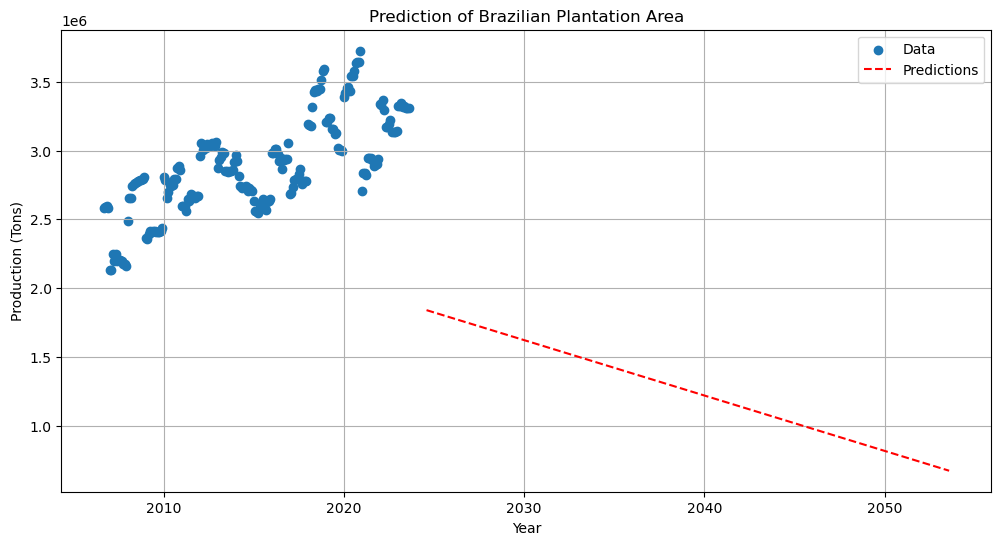

In [37]:
years_in_future = range(1, 31)  # 1년 후부터 30년 후까지
future_years = [data_sbrazil['Date'].max() + years for years in years_in_future]
predicted_productions = model.predict(np.array(future_years).reshape(-1, 1))

# 예측 결과를 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.scatter(data_sbrazil['Date'], data_brazil['생산량(톤)'], label='Data')
plt.plot(future_years, predicted_productions, 'r--', label='Predictions')
plt.title('Prediction of Brazilian Plantation Area')
plt.xlabel('Year')
plt.ylabel('Production (Tons)')
plt.legend()
plt.grid(True)
plt.show()